# Logistic Regression

- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측
- 분류용 선형 모델에서는 결정경계가 입력의 선형함수 
- 이진 선형 분류기는 선, 평면, 초평면을 이용하여 2개의 클래스를 구분하는 분류기

- 선형 모델을 학습 시키는 알고리즘

  (1) 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
  
  (2) 사용할 수 있는 규제가 있는지 있다면 어떤 방식인지

## 와인 데이터를 이용한 분류
- 포트투칼의 비뉴 베르드 지방에서 만들어진 와인을 측정한 데이터
- 데이터셋 구성
   - 1,599개의 레드와인 데이터, 4,898개의 화이트와인 데이터 (총 6,497개 데이터)
   - 12개의 정보와 1개의 클래스로 구성


In [76]:
import pandas as pd

wine = pd.read_csv("./Data/wine.csv", header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [77]:
from sklearn.model_selection import train_test_split

x_data = wine.iloc[:,0:-1]
y_data = wine.iloc[:,-1]

# 트레인, 테스트 데이터 나누기.
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3,random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression

# solver가 liblinear에서 lbfgs로 변경되면서 max_iter의 크기를 크게 잡아주어야 학습이 제대로 됨
lr_model_wine = LogisticRegression(C=0.01, max_iter=15000).fit(X_train, y_train)

In [79]:
lr_model_wine.score(X_train, y_train)

0.9502968990543216

In [80]:
lr_model_wine.score(X_test, y_test)

0.9415384615384615

In [81]:
y_pred = lr_model_wine.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## (실습) 최적의 C 값을 찾아보자

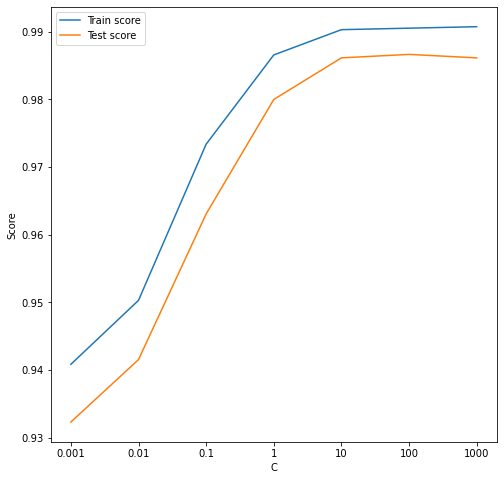

In [82]:
import matplotlib.pyplot as plt

train_acc = []
test_acc = []

c_list = ["0.001",  "0.01", "0.1", "1", "10", "100", "1000"]

for i in c_list:
  lr_model = LogisticRegression(C=float(i), max_iter=15000)
  lr_model.fit(X_train, y_train)
  train_acc.append(lr_model.score(X_train, y_train))
  test_acc.append(lr_model.score(X_test, y_test))

plt.figure(figsize=(8,8))  
plt.plot(c_list, train_acc, label="Train score")
plt.plot(c_list, test_acc, label="Test score")
plt.legend()
plt.xlabel("C")
plt.ylabel("Score")
plt.show()

## (실습) 교차 검증을 적용해 보자

In [83]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(lr_model_wine, X_train, y_train, cv=5)
result

array([0.95054945, 0.95274725, 0.95269527, 0.93729373, 0.95159516])

In [84]:
result.mean()

0.948976172342509

## Logistic Regression 특징

- C 값에 의해 규제 (L1, L2 모두 사용)
- 학습속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터 셋에도 잘 동작함 (solver='sag')

# LinearSVC

In [85]:
from sklearn.svm import LinearSVC

svc_model_wine = LinearSVC(C=0.01).fit(X_train, y_train)

In [86]:
svc_model_wine.score(X_test, y_test)

0.9646153846153847

In [87]:
pred = svc_model_wine.predict(X_test)

pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Linear SVC와 Logistic Regression의 장단점

- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 C
- alpha 값이 클수록, C 값이 작을수록 모델이 단순해짐 -> 강한 규제
- 회귀 모델에서 이 매개변수를 조정하는 일이 매우 중요

- L1 규제를 사용할지 L2 규제를 사용할지를 정해야 함
- 중요한 특성이 많지 않다고 생각하면 L1 규제를 사용하고 그렇지 않으면 기본적으로 L2 규제를 사용

- 선형 모델은 학습 속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동
- 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록 LogisticRegression과 Ridge에 solver=’sag’ 옵션 20 을 줌

- 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동
- 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용

# 분류 평가지표

### scoring  파라미터 참조 사이트 : https://scikit-learn.org/stable/modules/model_evaluation.html

### ROC / AUC : http://shinhanlife.ml/learning?type=2&section=8

### 참고사이트 (추가할 내용)

- https://data-newbie.tistory.com/31

- https://itchipmunk.tistory.com/195

In [88]:
import warnings
 
# 경고 메시지 출력 안함  
warnings.filterwarnings("ignore")

## 평가지표 종류 (사이킷런 패키지는 metrics 서브패키지)

- confusion_matrix(y_true, y_pred)
- accuracy_score(y_true, y_pred)
- precision_score(y_true, y_pred)
- recall_score(y_true, y_pred)
- fbeta_score(y_true, y_pred, beta)
- f1_score(y_true, y_pred)
- classfication_report(y_true, y_pred)
- roc_curve
- auc

# 2진 분류의 평가 지표

- 에러의 종류 
(1) 거짓 양성 : 잘못된 양성 예측
(2) 거짓 음성 : 잘못된 음성 예측

In [89]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

lr = LogisticRegression(C=0.1).fit(X_train, y_train)
  
pred_lr = lr.predict(X_test)

print("테스트 점수: {:.2f}".format(lr.score(X_test, y_test)))

테스트 점수: 0.94


## confusion matrix (오차 행렬)

- 0,0 진짜 악성, 예측 악성
- 0,1 진짜 악성, 예측 양성
- 1,0 진짜 양성, 예측 악성
- 1,1 진짜 양성, 예측 양성

In [90]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, pred_lr))

[[50  3]
 [ 5 85]]


### classification_report 함수 : 정밀도(precision), 재현율 (recall), f1점수를 보여주는 기능

- 정확도 : TP+TN / (TP + TN + FP + FN)

- 정밀도 : 양성으로 예측된 것 (TP + FP) 중 얼마나 많은 샘플이 진짜 양성(TP) 인지 측정 

- 재현율 (민감도) : 전체 양성 샘플 (TP + FN) 중에서 얼마나 많은 샘플이 양성 (TP)로 분류 되는지 측정 -> 진짜 양성 비율

- f1점수 : 정밀도와 재현율을 이용한 점수

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_lr,
                            target_names=["악성", "양성"]))

              precision    recall  f1-score   support

          악성       0.91      0.94      0.93        53
          양성       0.97      0.94      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



- macro avg : 다중분류 시에 각각의 클래스에 대해 recall, precision, f1을 구해서 평균을 내는 것 -> 분류자가 각 클래스에 대해 얼마나 평균적으로 잘 동작하는지 알고 싶을 때 사용
   - macro recall : (Recall for Class 1 + Recall for Class 2) / 2

- micro avg : 다중분류 시에 pooled 행렬을 이용하여 한번에 계산하는 것 -> 각 클래스별로 측정된 recall, recision, f1의 크기가 다른 경우 사용

   - micro recall = (TP1 + TP2) / (TP1 + TP2 + FN1 + FN2) 

- weight avg (가중평균) : 개별치에 각각의 중요도,영향도(빈도) 등에 따라 가중치를 곱하여 구해지는 평균

    - 일반평균 : (값1 + 값2) / 2
    - 가중평균 : (값1*개수1 + 값2*개수2) / (개수1+개수2)

# 다중 분류의 평가지표

- 다중 분류에 가장 널리 사용되는 평가지표 : f1-score

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)

pred = lr.predict(X_test)

print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n{}".format(confusion_matrix(y_test, pred)))

정확도: 0.974
오차 행렬:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [93]:
!pip install mglearn

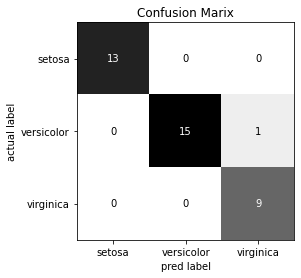

In [94]:
import mglearn

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='pred label',
    ylabel='actual label', xticklabels=iris.target_names,
    yticklabels=iris.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("Confusion Marix")
plt.gca().invert_yaxis()

- setosa와 versicolor 클래스의 행 값이 모두 0으로 분류

- setosa와 virginica 클래스의 열 값이 모두 0으로 분류

- versicolor 5개를 virginica로 잘못 분류

### 정밀도, 재현율 f1 점수 계산

In [95]:
print(classification_report(y_test, pred, target_names=["setosa", "versicolor", "virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



- 0 클래스 (setosa)는 오차가 없으므로 정밀도와 재현율이 1.0으로 완벽함

- 1 클래스 (versicolor)는 FP가 없어서 정밀도는 1이지만 FN이 존재하므로 재현율이 0.69가 됨

- 2 클래스 (virginica)는 FN이 없어서 재현율이 1이지만 FP가이 존재하므로 0.64가 됨

## ROC 곡선 그리기

- ROC(Receiver Operating Characteristic) : 여러 임계값에서 분류기의 특성을 분석하는데 널리 사용되는 도구
- 정밀도-재현율 곡선과 비슷하게 ROC 곡선은 분류기의 모든 임계값을 고려하지만 정밀도와 재현율 대신에 진짜 양성 비율 (TPR)에 대한 거짓 양성 비율 (FPR)을 나타냄

- 클래스의 분포가 다르고 겹치는 부분이 존재한 경우에 Accuracy의 단점을 보완하기 위한 것

- 진짜 양성비율 (TPR): 재현율 -> 예측한 값중 얼마나 정확히 예측했는지에 대한 비율
- 가짜 양성비율 (FPR): 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율


In [96]:
#Image('/gdrive/My Drive/Colab Notebooks/인공지능강의안/img/roc_auc.png')

- 양 끝쪽의은 확실히 정상과 암 환자를 구분할 수 있지만 겹치는 부분은 불분명할 수 있음 -> Error


- 많이 겹치는 부분이 많을 수록 직선에 가까워지고 성능이 떨어짐

- 따라서, ROC 곡선이 좋은 모델을 선정하는 것이 필요

- 구분선을 왼쪽으로 옮기면 (초록색) TN=0이므로 1-TNR=1, FN=0이므로 TPF=1 (초록색원 위치)

- 구분선을 오른쪽으로 옮기면 (파란색) TP=0이므로 TPR=0, TN=1이므로 1-TNR=0 (파란색원 위치)

### ROC 곡선 그리기
 
- roc_curve() : ROC 곡선을 그리는 메소드

- 왼쪽 위쪽에 가까울수록 이상적 - FPR이 낮게 유지되면서 재현율이 높다는 의미  <- 예측한 값중 얼마나 정확히 예측했는지에 대한 비율

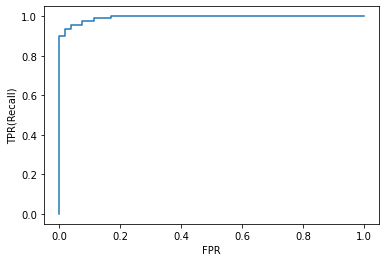

In [97]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

lr = LogisticRegression(C=1).fit(X_train, y_train)

fpr,tpr,_ = roc_curve(y_test, lr.decision_function(X_test))

plt.plot(fpr,tpr)
plt.xlabel("FPR")          # 가짜 양성 비율 : 전체 음성 샘플중에서 거짓 양성으로 잘못 판정한 비율
plt.ylabel("TPR(Recall)")  # 재현율 : 예측한 값 중에서 얼마나 정확히 예측했는지에 대한 비율
plt.show()

### ROC 곡선 비교

In [98]:
lr2 = LogisticRegression(C=10)
lr2.fit(X_train,y_train)

LogisticRegression(C=10)

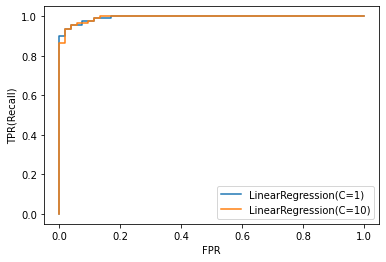

In [99]:
fpr2,tpr2,_ = roc_curve(y_test,lr2.decision_function(X_test))

plt.plot(fpr,tpr, label="LinearRegression(C=1)")
plt.plot(fpr2,tpr2, label="LinearRegression(C=10)")
plt.legend()
plt.xlabel("FPR")  # 가짜 양성 비율 : 전체 음성 샘플중에서 거짓 양성으로 잘못 판정한 비율
plt.ylabel("TPR(Recall)") # 재현율 : 예측한 값 중에서 얼마나 정확히 예측했는지에 대한 비율
plt.show()

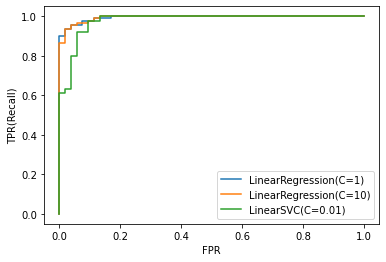

In [100]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01).fit(X_train, y_train)

fpr3,tpr3,_ = roc_curve(y_test,svc.decision_function(X_test))

plt.plot(fpr,tpr, label="LinearRegression(C=1)")
plt.plot(fpr2,tpr2, label="LinearRegression(C=10)")
plt.plot(fpr3,tpr3, label="LinearSVC(C=0.01)")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")
plt.show()

## AUC (Area Under Curve) 그리기 ( 3차 패스)

- ROC가 곡선으로 표현한다면 AUC는 면적으로 표시

- roc_auc_score() 함수로 계산

In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

rf_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, lr2.decision_function(X_test))

print("로지스틱 회귀의 AUC (0.1): {:.3f}".format(rf_auc))
print("로지스틱 회귀의 AUC (10): {:.3f}".format(svc_auc))

로지스틱 회귀의 AUC (0.1): 0.994
로지스틱 회귀의 AUC (10): 0.994


gamma = 1.00  정확도 = 0.63  AUC = 0.53
gamma = 0.10  정확도 = 0.63  AUC = 0.86
gamma = 0.01  정확도 = 0.64  AUC = 0.92


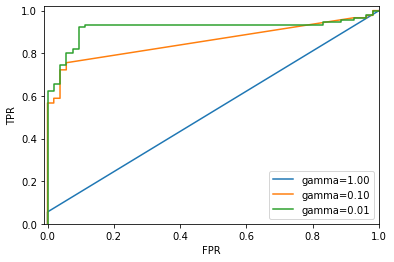

In [102]:
y = cancer.target == y_test[1]

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
    
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

- gamma 값에 따라 정확도는 유사하지만 AUC와 ROC 곡선을 보면 세 모델의 차이를 뚜렷하게 확인할 수 있음

- 결정함수에 의해 대부분의 양성 포인트는 어떤 음성 포인트보다 더 높은 점수를 가짐.

- 불균형한 데이터를 사용할 경우 AUC로 평가하는 것을 권장

# GridSearch

- 매개변수을 선택하는 것은 머신러닝에서 중요한 일

- GRID_SEARCH : 관심 있는 매개변수들을 대상으로 가능한 모든 조합 시도하는 것

## GridSearchCV 메소드를 이용한 그리드서치

- GridSearch 기능과 교차검증을 동시에 수행

In [103]:
# 딕셔너리 형태로 파라미터의 값들을 설정
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# return_train_score : 훈련 폴드(cv)의 점수를 받을지 여부를 설정
# scoring : 분류 (accuracy, f1), 회귀 (neg_mean_squared_error, r2)
# n_jobs : 병렬처리 수 (CPU 코어 수가 충분하다면 설정, 디폴트 1) - 내부적으로 멀티프로세스 동작 -> 속도 증가
#grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True, scoring='f1_micro', n_jobs=2)
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [105]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

- GridSearchCV 객체에 fit() 매서드는 최적의 매개변수를 찾는 일 뿐만 아니라 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터 세트에 대해 새로운 모델을 자동을 만듬

- GridSearchCV는 전체 데이터로 학습한 모델에 접근할 수 있도록 predict()와 score() 메서드 제공

- GridSearchCV 분류 : StratifiedKFold 회귀 : KFold

- 사용에 따라서는 predict_proba, decision_function도 제공

In [106]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


In [107]:
print("최적 매개변수: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 10}
최고 교차 검증 점수: 0.97


- 최적 매개 변수에서 전체 훈련 세트를 사용하여 학습한 모델은 best_estimator_

- grid_search 객체가 predict와 score 메서드를 가지고 있으므로 예측이나 모델을 평가하기 위해 best_estimator_ 속성을 사용할 필요가 없다.

In [108]:
print("최고 성능 모델:\n{}".format(grid_search.best_estimator_))

최고 성능 모델:
LogisticRegression(C=10)


(실습) DecisionTree 모델의 최적 파라미터 찾기 (max_depth, max_leaf_nodes, min_samples_leaf)

In [109]:
iris.data.shape

(150, 4)

In [110]:
from sklearn.tree import DecisionTreeClassifier

param = {"max_depth":range(1,5), "max_leaf_nodes":range(1, 50, 10), "min_samples_leaf":range(1, 150, 10)}

grid_search = GridSearchCV(DecisionTreeClassifier(), param, cv=5)

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 5),
                         'max_leaf_nodes': range(1, 50, 10),
                         'min_samples_leaf': range(1, 150, 10)})

In [111]:
print("최고의 매개변수 :", grid_search.best_params_)
print("최고의 점수 :", grid_search.best_score_)

최고의 매개변수 : {'max_depth': 3, 'max_leaf_nodes': 11, 'min_samples_leaf': 1}
최고의 점수 : 0.9644268774703558
